In [1]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [2]:
## load the dataset
air = pd.read_csv("M1_final.csv")
air.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [3]:
## info on dataset
air.info()

# need to deal with data types as non-numeric is not useful in regression

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [4]:
## stats summary 
air.describe()

# Good that no null value

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [5]:
## dew point is with numeric values (only dtype changes)
air["Dew Point"] = air["Dew Point"].astype(np.int64)

## other object variables is with non-numeric values (number labelling and dtype changes)
le = LabelEncoder()
air["OP_UNIQUE_CARRIER"] = le.fit_transform(air["OP_UNIQUE_CARRIER"].astype(np.string_))
air["OP_UNIQUE_CARRIER"] = air["OP_UNIQUE_CARRIER"].astype(np.int64)
air["TAIL_NUM"] = le.fit_transform(air["TAIL_NUM"].astype(np.string_))
air["TAIL_NUM"] = air["TAIL_NUM"].astype(np.int64)
air["DEST"] = le.fit_transform(air["DEST"].astype(np.string_))
air["DEST"] = air["DEST"].astype(np.int64)
air["Wind"] = le.fit_transform(air["Wind"].astype(np.string_))
air["Wind"] = air["Wind"].astype(np.int64)
air["Condition"] = le.fit_transform(air["Condition"].astype(np.string_))
air["Condition"] = air["Condition"].astype(np.int64)



air.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,3,1405,10,-1,124,636,324,...,34,58,15,25,38,29.86,4,9,17,14
1,11,1,5,3,2074,28,-7,371,2475,340,...,34,58,15,25,38,29.86,4,9,17,15
2,11,1,5,3,1942,20,40,181,1069,301,...,34,58,15,25,38,29.86,4,9,17,22
3,11,1,5,3,2091,30,-2,168,944,345,...,34,58,15,25,38,29.86,4,9,17,12
4,11,1,5,4,1583,1,-4,139,760,360,...,32,58,15,24,35,29.91,4,9,17,13


In [6]:
## info on dataset
air.info()

# all numeric now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  int64  
 4   TAIL_NUM           28820 non-null  int64  
 5   DEST               28820 non-null  int64  
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  int64  
 14  Humidity           28820 non-null  int64  
 15  Wind               28820 non-null  int64  
 16  Wind Speed         288

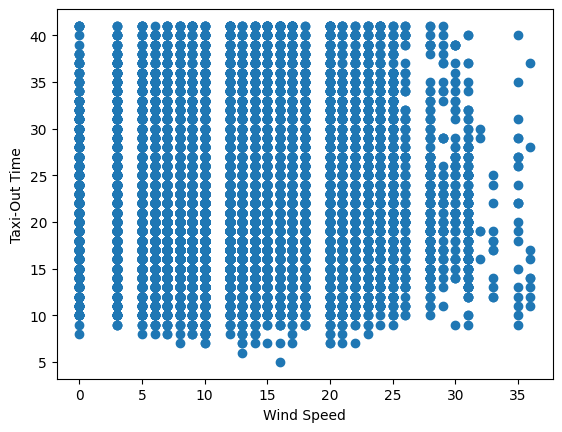

In [7]:
## scatterplot Wind Speed against Taxi-Out Time
plt.scatter(air['Wind Speed'], air['TAXI_OUT'])

## label the axes
plt.xlabel("Wind Speed")
plt.ylabel("Taxi-Out Time")

plt.show()

## TAXI_OUT measured in integers, not visually deducable with regard to trends or tendency in data 

In [8]:
## correlation matrix
corr_matrix = air.corr()
corr_matrix

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.015554,-0.004192,0.007027,0.046455,-0.016052,-0.000144,0.001824,...,0.135040,0.012515,0.006790,-0.035097,-0.051014,-0.085274,0.045347,-0.006191,-0.019705,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,0.014098,0.000987,0.004874,-0.036618,0.002761,-0.002762,0.001754,...,-0.040129,0.096215,-0.219075,-0.093211,-0.088991,0.016871,0.024828,-0.003417,0.002223,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,0.008258,-0.001776,0.006176,-0.006203,0.000413,0.002450,0.005411,...,-0.073816,0.001627,0.062501,0.095943,0.127689,0.102289,0.062235,0.024415,0.009621,0.028388
OP_UNIQUE_CARRIER,0.015554,0.014098,0.008258,1.000000,-0.006863,-0.010131,0.006026,0.049573,0.062042,0.010360,...,0.015831,0.000121,0.000286,-0.004643,-0.001205,-0.009238,0.013151,0.050557,0.008899,0.008705
TAIL_NUM,-0.004192,0.000987,-0.001776,-0.006863,1.000000,0.134191,-0.013436,0.086213,0.091885,0.025927,...,0.000332,0.006892,-0.000071,0.002496,0.000326,-0.002889,-0.010735,-0.006647,-0.007899,-0.017930
DEST,0.007027,0.004874,0.006176,-0.010131,0.134191,1.000000,-0.012129,0.355419,0.366584,-0.031534,...,0.007586,0.009410,-0.007718,-0.007573,-0.005510,0.002692,-0.002628,0.060569,-0.050518,0.076594
DEP_DELAY,0.046455,-0.036618,-0.006203,0.006026,-0.013436,-0.012129,1.000000,-0.030871,-0.031507,0.102384,...,-0.000013,-0.011776,0.030267,0.067718,0.044340,-0.064939,-0.000838,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.016052,0.002761,0.000413,0.049573,0.086213,0.355419,-0.030871,1.000000,0.994465,-0.031332,...,0.007246,0.017198,-0.004973,-0.013440,-0.011934,0.010165,-0.001969,0.083426,-0.067669,0.070838
DISTANCE,-0.000144,-0.002762,0.002450,0.062042,0.091885,0.366584,-0.031507,0.994465,1.000000,-0.040963,...,0.009789,0.015110,-0.004560,-0.010734,-0.009522,0.005692,-0.002025,0.059174,-0.088793,0.059856
CRS_DEP_M,0.001824,0.001754,0.005411,0.010360,0.025927,-0.031534,0.102384,-0.031332,-0.040963,1.000000,...,0.001578,0.003843,0.024199,0.008063,-0.009887,-0.008285,0.019744,-0.025621,0.495286,0.044864


<AxesSubplot: >

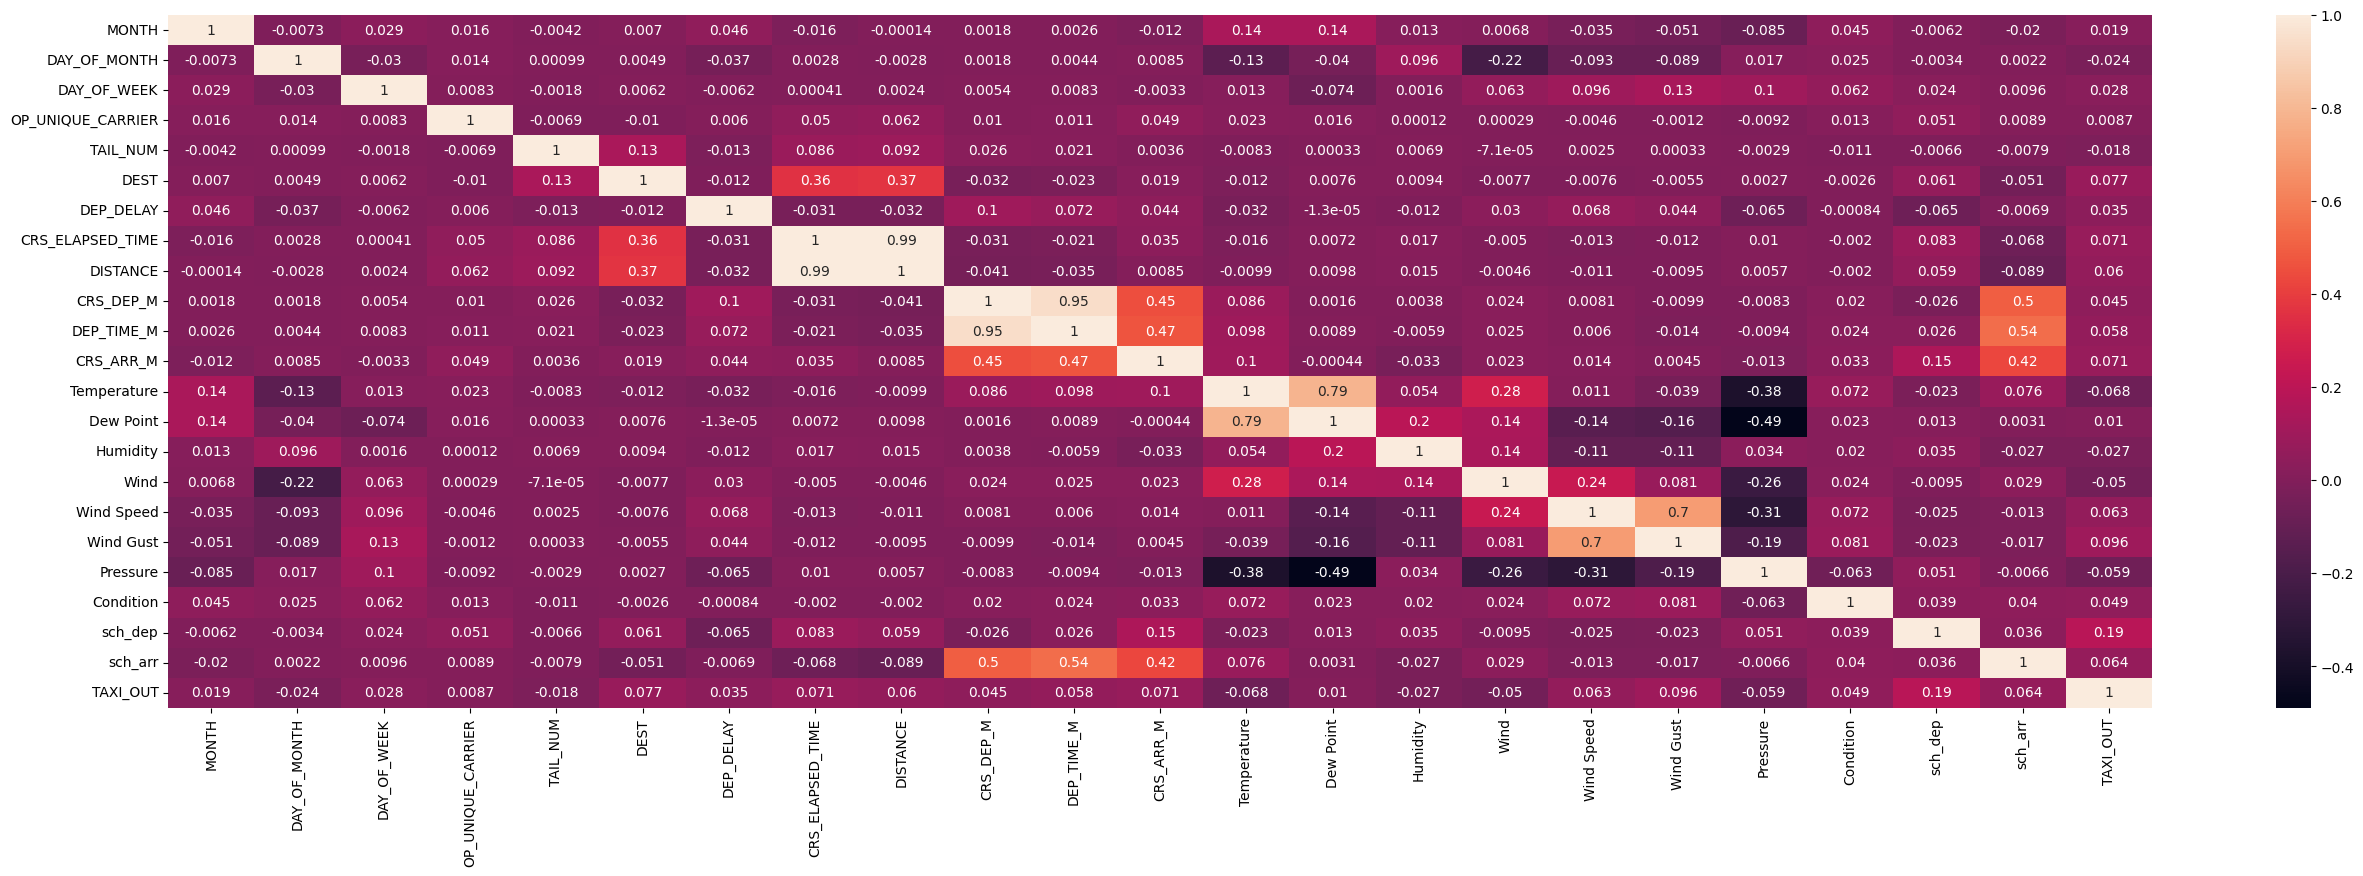

In [9]:
## correlation matrix
fig, ax=plt.subplots(figsize=(32,9))
sns.heatmap(corr_matrix, annot=True)

In [10]:
## set dependent and independent variables
Y = air["TAXI_OUT"]
X = air.drop("TAXI_OUT", axis=1)

In [11]:
## Set training and testing sample sizes
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=114514)

In [12]:
## STANDARD  SCALER
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
## LINEAR  REGRESSION
lin_reg = LinearRegression().fit(X_train, Y_train)
pred_lin = lin_reg.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_lin})

,Actual,Predicted
26475,13,21.087575
15282,14,17.781066
22319,26,22.721108
21036,17,19.827349
16452,19,21.600002
...,...,...
15488,17,20.559299
11502,15,20.264209
2743,24,20.652718
7751,16,21.339038


In [14]:
## robustness and accuracy test
print('MAE:', metrics.mean_absolute_error(Y_test, pred_lin))
print('MSE:', metrics.mean_squared_error(Y_test, pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred_lin)))
print('R2:', metrics.r2_score(Y_test, pred_lin))

MAE: 5.2710296558239556
MSE: 43.7757954951616
RMSE: 6.616327946464081
R2: 0.07943115088017438


In [15]:
## Lasso Regression 0.99
model_lasso = Lasso(alpha=0.99)
model_lasso.fit(X_train, Y_train)
pred_lasso = model_lasso.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_lasso})

,Actual,Predicted
26475,13,20.832798
15282,14,20.524351
22319,26,20.832798
21036,17,20.740264
16452,19,21.233780
...,...,...
15488,17,20.832798
11502,15,20.894488
2743,24,20.709419
7751,16,20.524351


In [16]:
## robustness and accuracy test
print('MAE:', metrics.mean_absolute_error(Y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(Y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred_lasso)))
print('R2:', metrics.r2_score(Y_test, pred_lasso))

MAE: 5.458970264810619
MSE: 46.849415465229576
RMSE: 6.844663283553807
R2: 0.014795459707185432


In [17]:
## Lasso Regression 0.95
model_lasso = Lasso(alpha=0.9)
model_lasso.fit(X_train, Y_train)
pred_lasso = model_lasso.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_lasso})

,Actual,Predicted
26475,13,20.822799
15282,14,20.420287
22319,26,20.822799
21036,17,20.702045
16452,19,21.346064
...,...,...
15488,17,20.822799
11502,15,20.903301
2743,24,20.661794
7751,16,20.420287


In [18]:
## robustness and accuracy test
print('MAE:', metrics.mean_absolute_error(Y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(Y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred_lasso)))
print('R2:', metrics.r2_score(Y_test, pred_lasso))

MAE: 5.4469102892269765
MSE: 46.66705645761926
RMSE: 6.831329040356588
R2: 0.018630319128095763


In [19]:
## random foresst regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=114514)
rf_reg.fit(X_train, Y_train)
rf_reg_pred = rf_reg.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': rf_reg_pred})

,Actual,Predicted
26475,13,18.62
15282,14,19.58
22319,26,29.46
21036,17,17.83
16452,19,26.56
...,...,...
15488,17,18.26
11502,15,20.30
2743,24,21.15
7751,16,20.50


In [20]:
## robustness and accuracy test
print('MAE:', metrics.mean_absolute_error(Y_test, rf_reg_pred))
print('MSE:', metrics.mean_squared_error(Y_test, rf_reg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, rf_reg_pred)))
print('R2:', metrics.r2_score(Y_test, rf_reg_pred))

MAE: 4.4709333795975015
MSE: 33.22270950728661
RMSE: 5.763914425742857
R2: 0.3013538392661431


In [21]:
## Polynomial regression
poly_reg = PolynomialFeatures(degree=2)
X_train_2 = poly_reg.fit_transform(X_train)
X_test_2 = poly_reg.transform(X_test)


mul_reg = LinearRegression()
mul_reg.fit(X_train_2, Y_train)
mul_pred = mul_reg.predict(X_test_2)
pd.DataFrame({'Actual': Y_test, 'Predicted': mul_pred})

,Actual,Predicted
26475,13,20.638275
15282,14,17.979095
22319,26,24.247406
21036,17,18.219818
16452,19,20.524994
...,...,...
15488,17,24.060150
11502,15,19.815033
2743,24,19.338715
7751,16,21.373016


In [22]:
## robustness and accuracy test
print('MAE:', metrics.mean_absolute_error(Y_test, mul_pred))
print('MSE:', metrics.mean_squared_error(Y_test, mul_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, mul_pred)))
print('R2:', metrics.r2_score(Y_test, mul_pred))

MAE: 5.127011984111037
MSE: 41.53160602122233
RMSE: 6.44450199947384
R2: 0.1266246032860694


In [23]:
## ridge regression 0.99
model_ridge = Ridge(alpha=0.99, random_state= 114514)
model_ridge.fit(X_train, Y_train)
pred_ridge = model_ridge.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_ridge})

,Actual,Predicted
26475,13,21.085320
15282,14,17.780927
22319,26,22.718294
21036,17,19.824831
16452,19,21.598138
...,...,...
15488,17,20.566963
11502,15,20.261173
2743,24,20.654471
7751,16,21.334608


In [24]:
## mneasuring accuracy
print('MAE:', metrics.mean_absolute_error(Y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(Y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred_ridge)))
print('R2:', metrics.r2_score(Y_test, pred_ridge))

MAE: 5.271072530693626
MSE: 43.776054658785455
RMSE: 6.616347531590632
R2: 0.07942570088306433


In [25]:
## ridge regression 0.95
model_ridge = Ridge(alpha=0.95, random_state= 114514)
model_ridge.fit(X_train, Y_train)
pred_ridge = model_ridge.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_ridge})

,Actual,Predicted
26475,13,21.085411
15282,14,17.780933
22319,26,22.718406
21036,17,19.824932
16452,19,21.598213
...,...,...
15488,17,20.566656
11502,15,20.261294
2743,24,20.654401
7751,16,21.334785


In [26]:
## mneasuring accuracy
print('MAE:', metrics.mean_absolute_error(Y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(Y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred_ridge)))
print('R2:', metrics.r2_score(Y_test, pred_ridge))

MAE: 5.271070817725402
MSE: 43.77604390509664
RMSE: 6.616346718930066
R2: 0.07942592702426443
